In [1]:
#LOAD THE FUNCTIONS WE MADE
import filters.filters as f
import image_load_and_converttion.load as l
import Analyse as a

In [81]:
import matplotlib.pyplot as plt
import math
from skimage import io, color, img_as_float
import numpy as np
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform

Shape of image is (800, 600, 3)
 data uint8


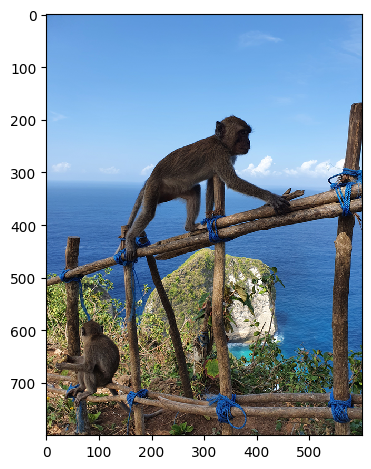

In [6]:
#load the image
dir="../data/data3/NusaPenida.png"
im_org=l.load_im(dir)

## Image rotation

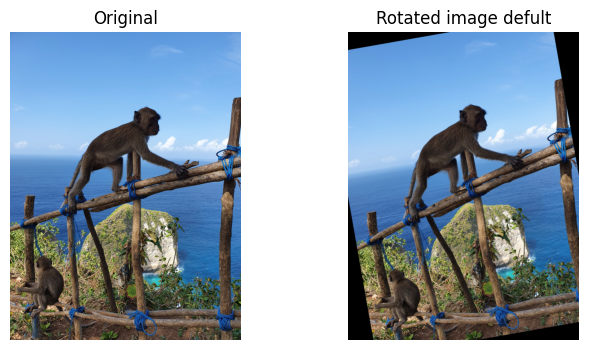

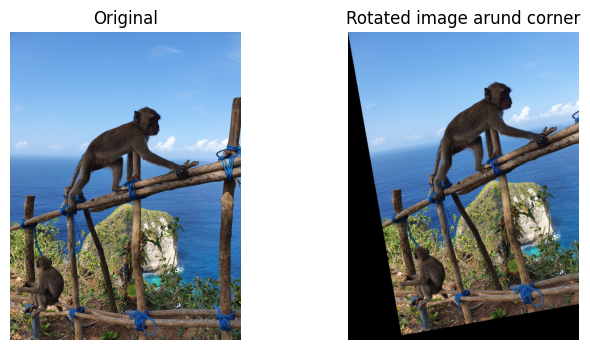

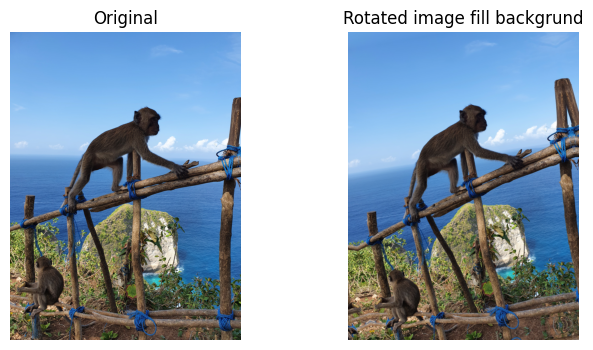

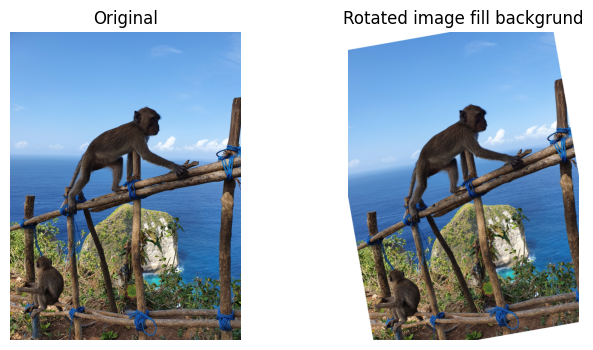

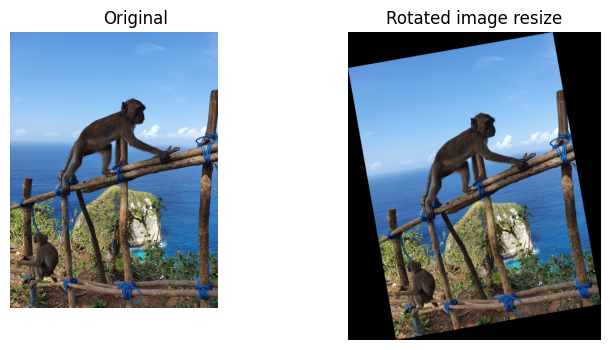

In [28]:
# angle in degrees - counter clockwise
#rotates the image

rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
a.show_comparison(im_org, rotated_img, "Rotated image defult")

#rotating around another then center
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
a.show_comparison(im_org, rotated_img, "Rotated image arund corner")


#difrent backgrund controles here us reflect
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
a.show_comparison(im_org, rotated_img, "Rotated image fill backgrund")


#difrent backgrund controles here us constand
rotated_img = rotate(im_org, rotation_angle, mode="constant", cval=1)
a.show_comparison(im_org, rotated_img, "Rotated image fill backgrund")


#rotate and then resize
rotated_img = rotate(im_org, rotation_angle, resize=True)
a.show_comparison(im_org, rotated_img, "Rotated image resize")



## Euclidean image transformation

An alternative way of doing geometric image transformations is to first construct the transformation and then apply it to the image. We will start by the Euclidean image transformation that consists of a rotation and a translation. It is also called a rigid body transformation.



In [29]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [0, 0]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)
#it can be seen in the print statement that the transformation consists of a 3 x 3 matrix. The matrix is used to transform points using homogenous coordinates. Notice that the angle is defined in radians in this function.

[[ 0.98480775 -0.17364818  0.        ]
 [ 0.17364818  0.98480775  0.        ]
 [ 0.          0.          1.        ]]


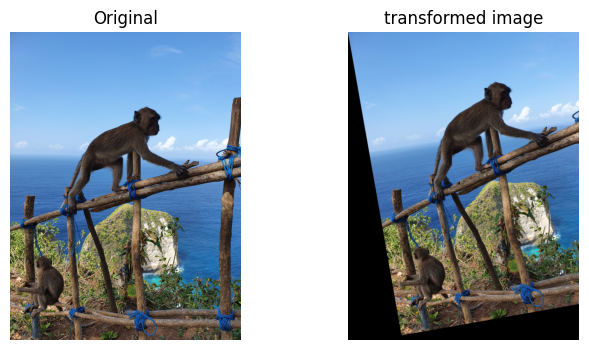

In [36]:
transformed_img = warp(im_org, tform)
a.show_comparison(im_org, transformed_img, "transformed image")


Inverse transformation

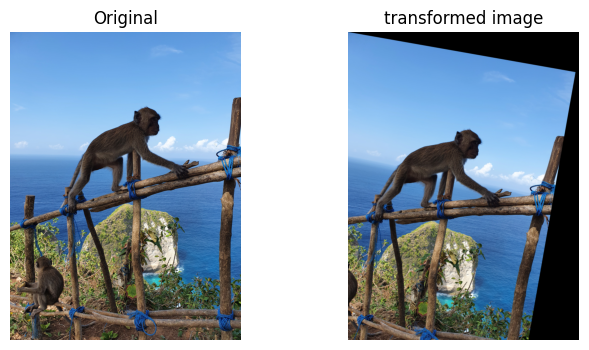

In [40]:
transformed_img1 = warp(im_org, tform.inverse)
a.show_comparison(im_org, transformed_img1, "transformed image")


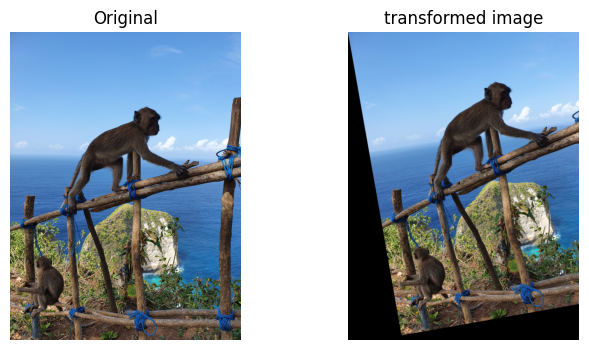

In [43]:
tform = EuclideanTransform(rotation=rotation_angle)
transformed_img = warp(im_org, tform)
a.show_comparison(im_org, transformed_img, "transformed image")


## Similarity transform of image

The SimilarityTransform computes a transformation consisting of a translation, rotation and a scaling.

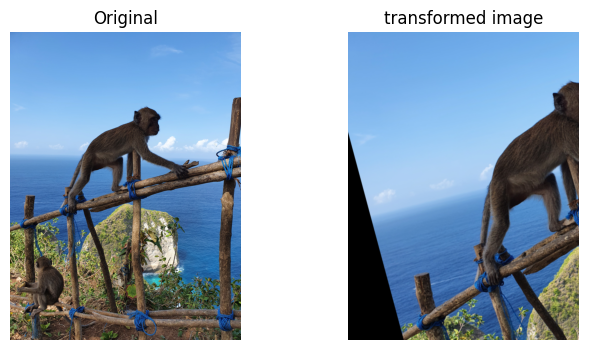

In [46]:
rotation_angle = 15.0 * math.pi / 180.
trans = [40, 30]
tform=SimilarityTransform(rotation=rotation_angle,scale=0.6,translation=trans)
transformed_img = warp(im_org, tform)
a.show_comparison(im_org, transformed_img, "transformed image")


## The swirl image transformation

The swirl image transform is a non-linear transform that can create interesting visual results on images.


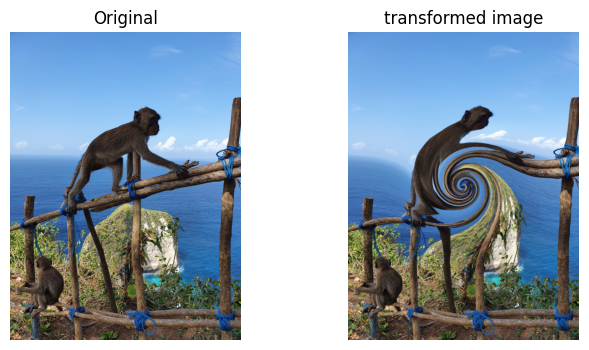

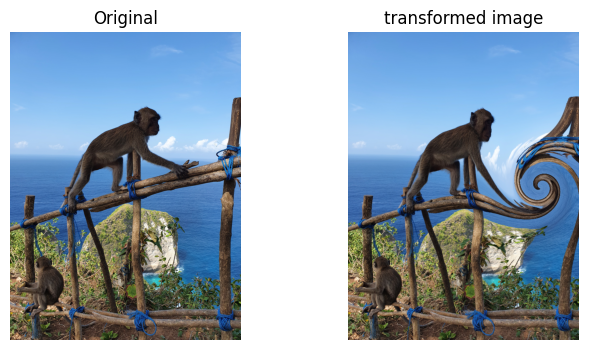

In [49]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)
a.show_comparison(im_org, swirl_img, "transformed image")

str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
a.show_comparison(im_org, swirl_img, "transformed image")


## Landmark based registration

The goal of landmark based registration is to align two images using a set of landmarks placed in both images. The landmarks need to have correspondence meaning that the landmarks should be placed on the same anatomical spot in the two images.

There are two photos of hands: Hand1.jpg and Hand2.jpg and the goal is to transform Hand1 so it fits on top of Hand2. In this exercise we call Hand1 one for the source (src) and Hand2 for the destination (dst).

Shape of image is (600, 800, 3)
 data uint8


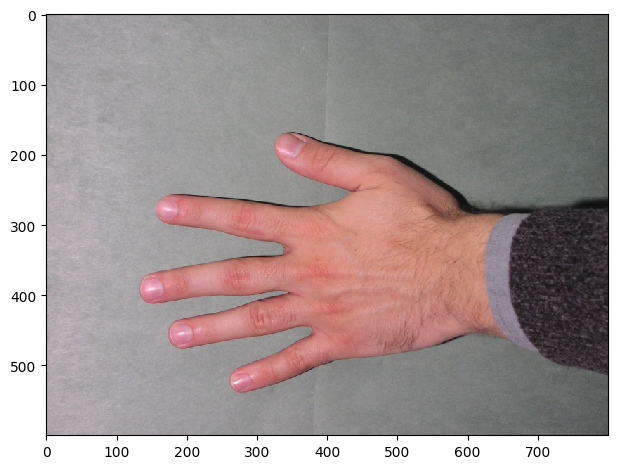

Shape of image is (600, 800, 3)
 data uint8


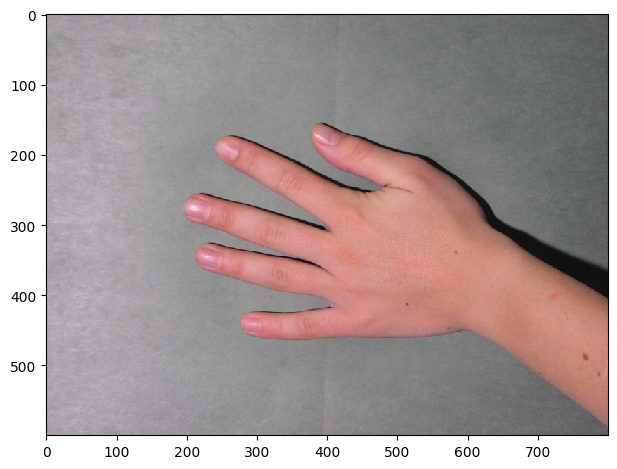

In [52]:
dir1="../data/data3/Hand1.jpg"
dir2="../data/data3/Hand2.jpg"

im_1=l.load_im(dir1)
im_2=l.load_im(dir2)

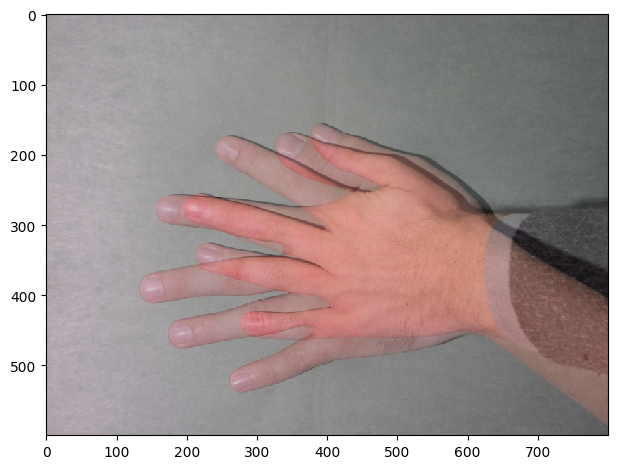

In [57]:
blend = 0.5 * img_as_float(im_1) + 0.5 * img_as_float(im_2)
io.imshow(blend)
io.show()

## Manual landmark annotation

We will manually placed landmarks on the two images to align the them

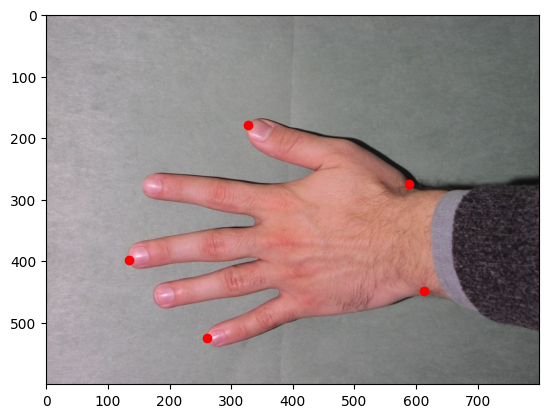

In [61]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(im_1)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

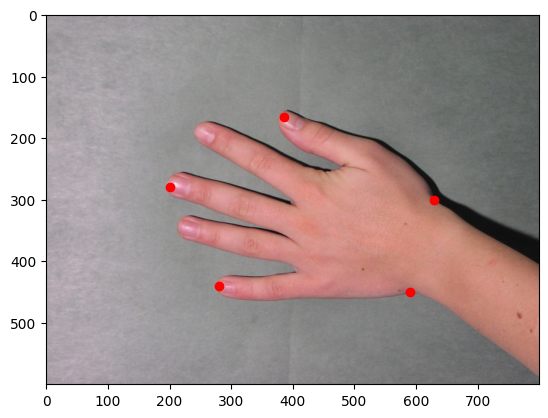

In [74]:
dst=np.array([[630,300],[385,165],[200,280],[280,440],[590,450]])

plt.imshow(im_2)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

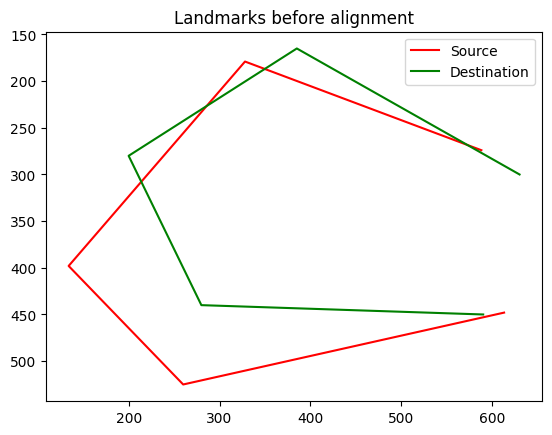

In [75]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

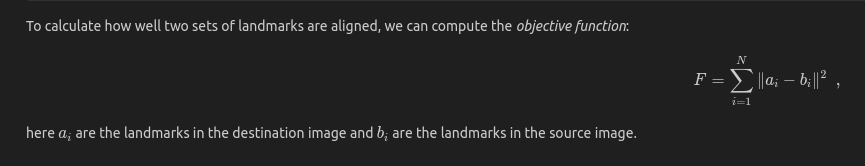

In [76]:
#Compute F from your landmarks. It can for example be done like:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 32323


Transforming by landmark

In [85]:
#The optimal Euclidean transformation that brings the source landmarks over in the destination landmarks can be found by:
tform = EuclideanTransform()
tform.estimate(src, dst)

src_transform = matrix_transform(src, tform.params)


Comparing the transformed src(im_1) whit dst(im_2)

Landmark alignment error F: 4783.540989209228


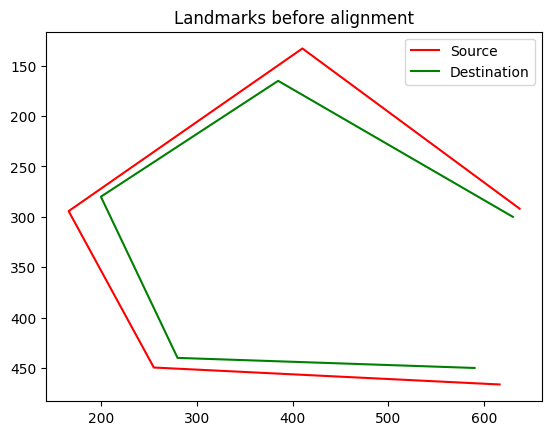

In [87]:

#Compute F from your landmarks. It can for example be done like:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

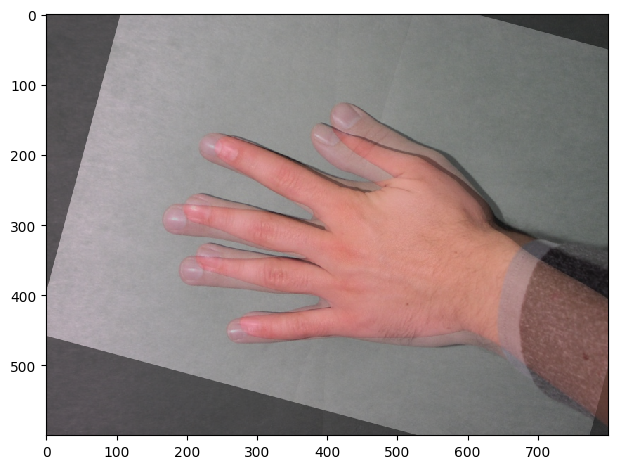

In [90]:
#aplay the transformation
warped = warp(im_1, tform.inverse)

#show the new image comparet the target
blend = 0.5 * img_as_float(warped) + 0.5 * img_as_float(im_2)
io.imshow(blend)
io.show()